## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [109]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [110]:
# Shape of the dataset
df.shape

(1000, 8)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [111]:
# Checking Missing Values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Conclusion:- No Missing Values found

In [112]:
# Checking for Duplicate values
df[df.duplicated()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [113]:
df.duplicated().sum()

0

Conclusion:- No Duplicate Values

In [114]:
# Checking the DataTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [115]:
# Checking the unique values of each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [116]:
# Checking the Statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [117]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [118]:
# Finding all the Categorical Columns form the dataset
num_features = []
cat_features = []
for column in df.columns:
    if df[column].dtypes == 'int64':
        num_features.append(column)
    else:
        cat_features.append(column)

print("Numerical Categories: ", num_features)
print("Categorical Categories: ", cat_features)

Numerical Categories:  ['math_score', 'reading_score', 'writing_score']
Categorical Categories:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [119]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = (df.total_score)/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Visualization

<Axes: >

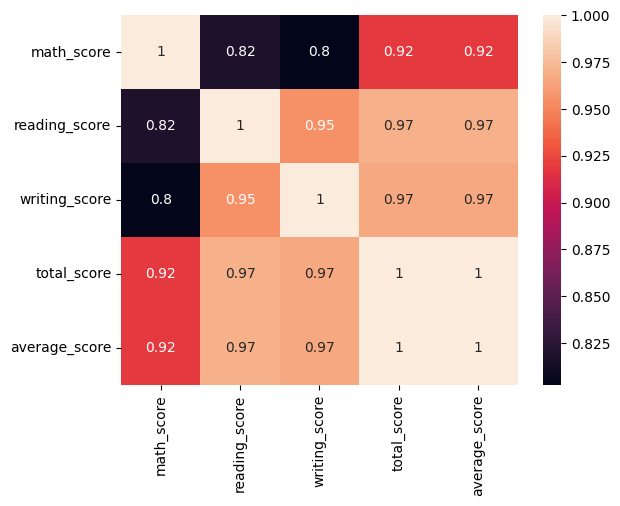

In [122]:
# Corelation between the Numerical Columns
sns.heatmap(df.corr(),annot=True)

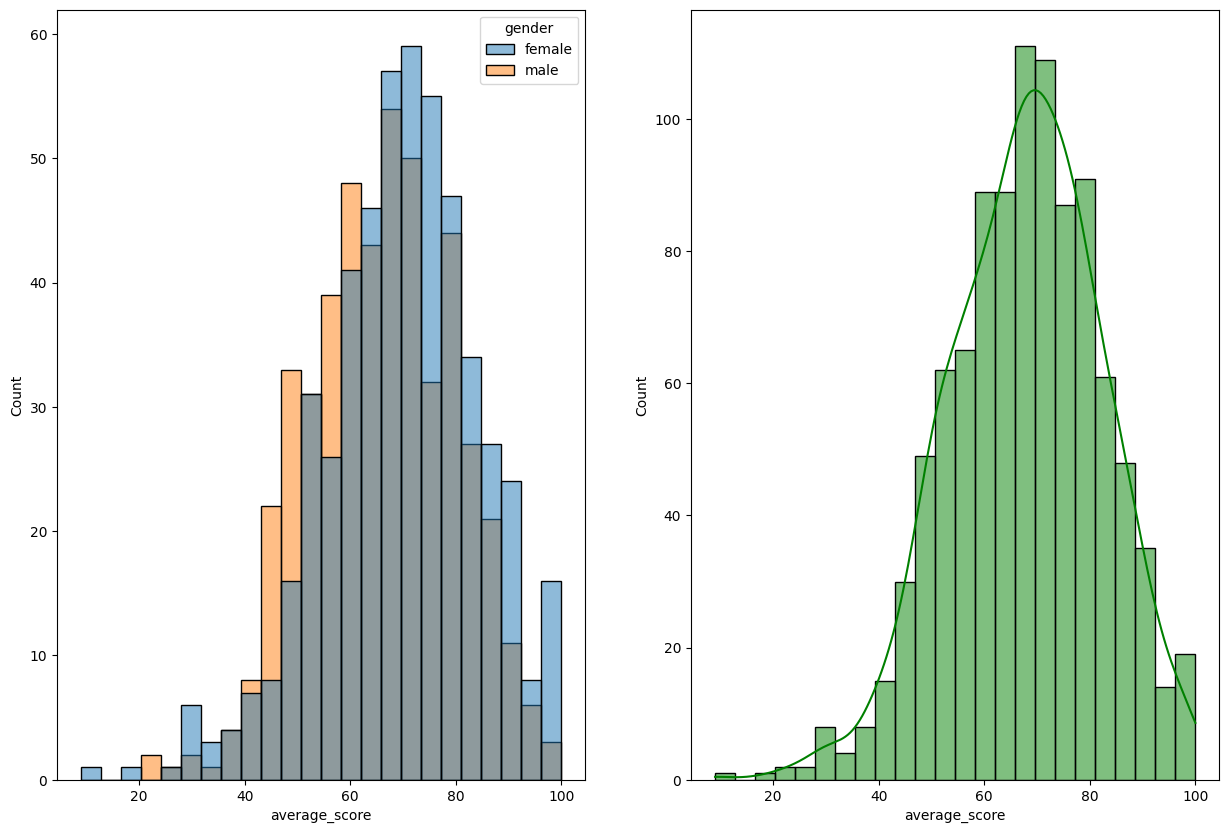

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(15,10))
plt.subplot(121)
sns.histplot(data=df,x='average_score',hue='gender')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,color='g')
plt.show()

### Insights
- Female Student tends to perform well than the male students

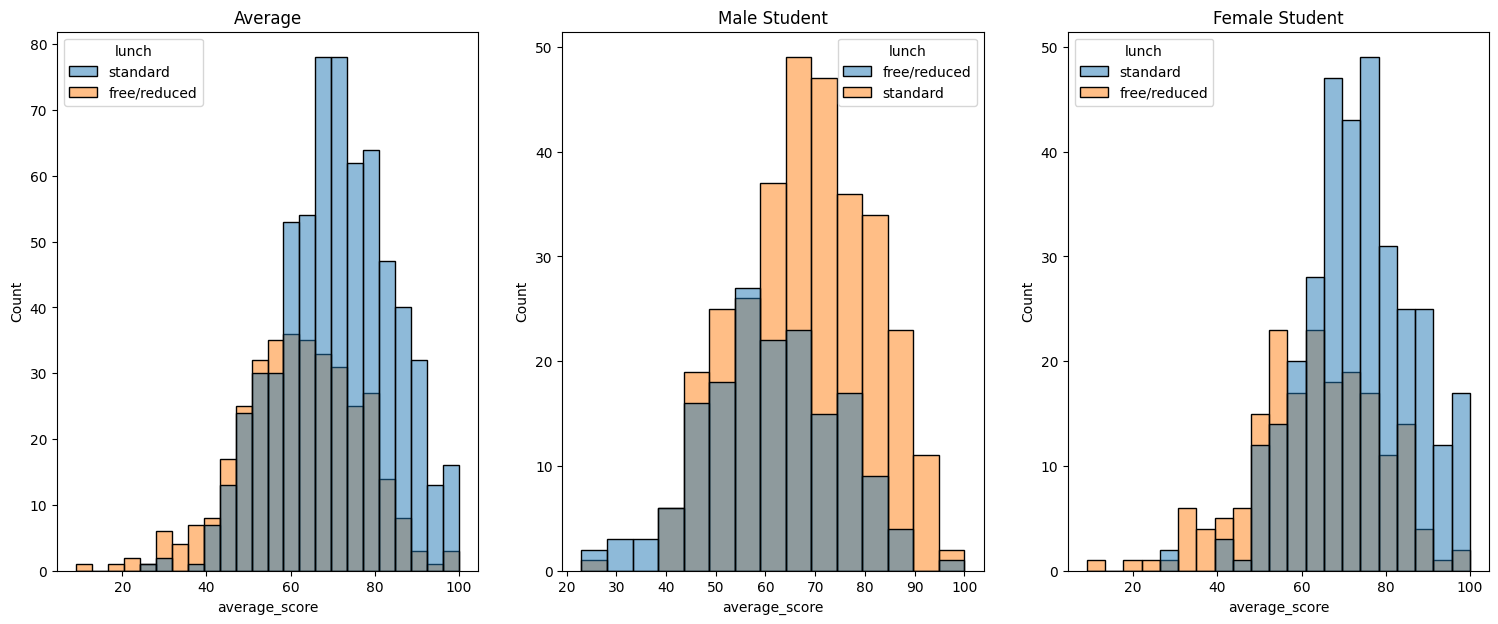

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
plt.title('Average')
sns.histplot(data=df,x='average_score',hue='lunch')
plt.subplot(142)
plt.title('Male Student')
sns.histplot(data=df[df['gender']=='male'],x='average_score',hue='lunch')
plt.subplot(143)
plt.title('Female Student')
sns.histplot(data=df[df['gender']=='female'],x='average_score',hue='lunch')
plt.show()

### Insights
- Students generally prefer Standard Lunch


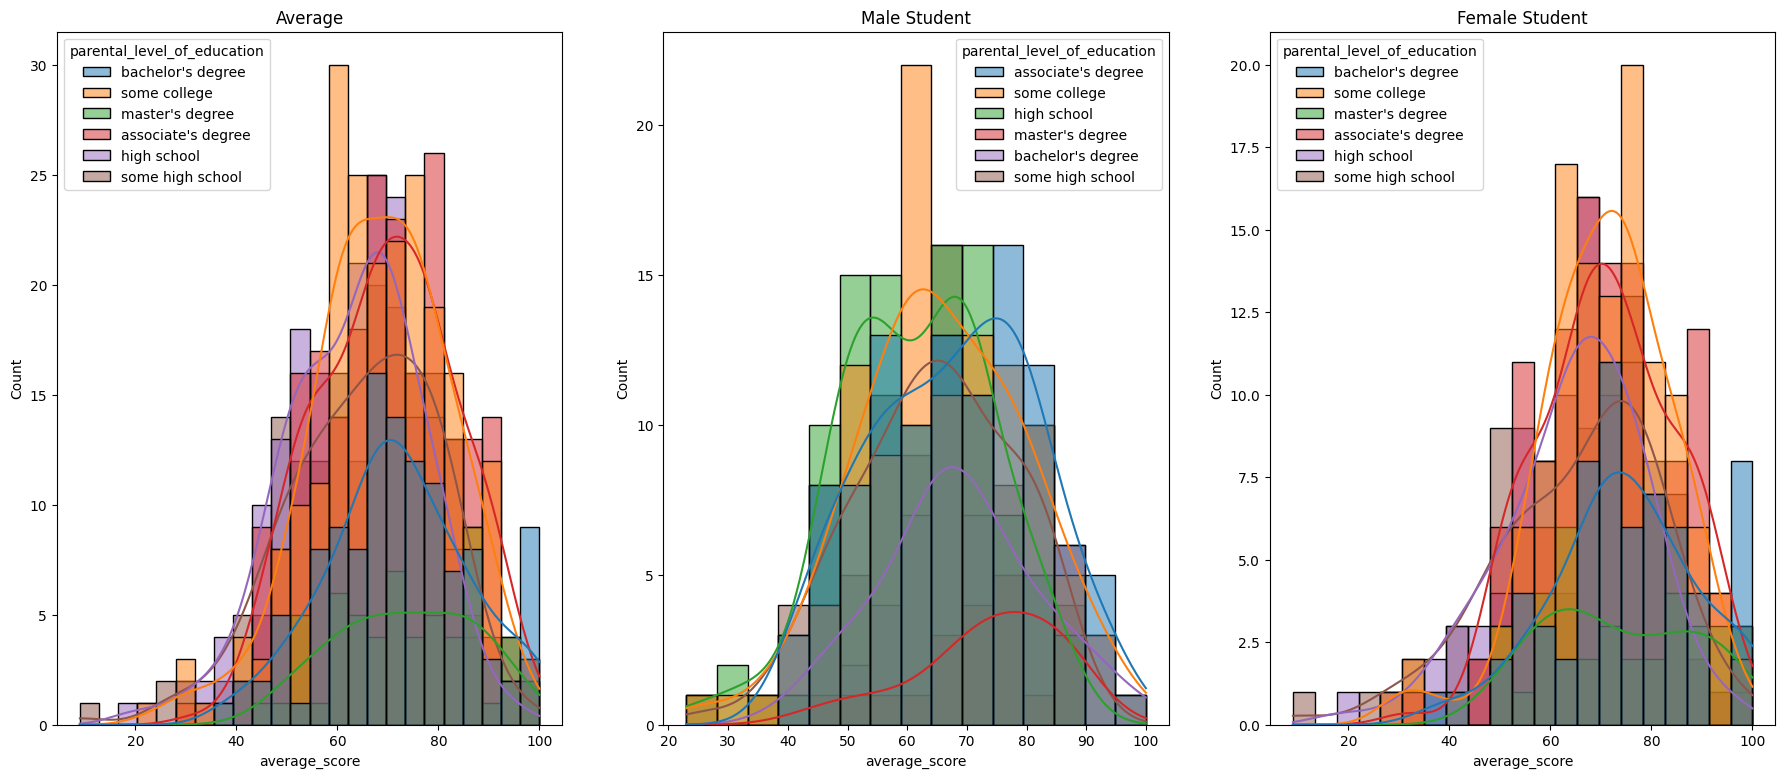

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(30,9))
plt.subplot(141)
plt.title('Average')
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
plt.title('Male Student')
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
plt.title('Female Student')
sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

### Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

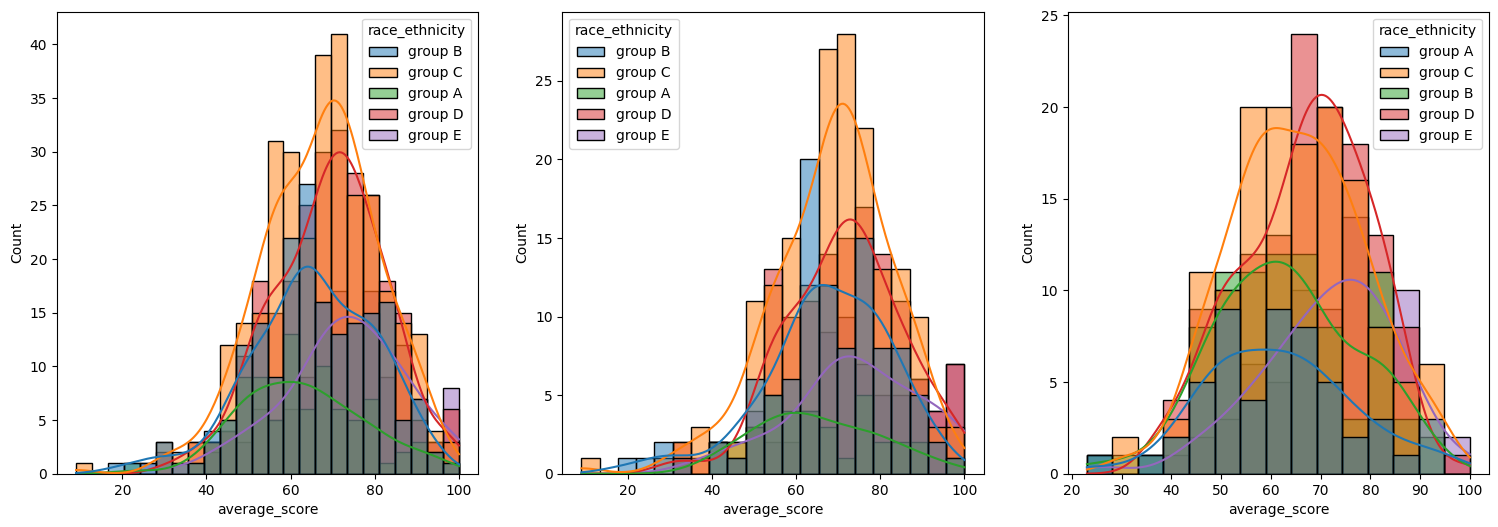

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female